In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,consensus_score,accuracy_score

**Importing the dataset**

In [4]:
dataset = pd.read_csv("Social_Network_Ads.csv")

In [5]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [6]:
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

**Feature Scaling**

In [8]:
# we dont require scaling for decision tree problems

**Fitting Decision Tree Classification to the Training set**

In [9]:
DTC = DecisionTreeClassifier(max_depth=3, min_samples_split=16)
DTC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=16)

**Predicting the Test set results**

In [10]:
y_pred=DTC.predict(x_test)

**Making the Confusion Matrix**

In [11]:
score = confusion_matrix(y_test,y_pred)
score 

array([[72,  7],
       [ 3, 38]], dtype=int64)

In [12]:
accuracy_score(y_test,y_pred)

0.9166666666666666

 ## estimating best pair

criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0

In [13]:
from sklearn.model_selection import GridSearchCV,KFold

In [14]:
param = {'criterion':['gini','entropy'],
         'max_depth':list(range(1,50)),
         'min_samples_split': list(range(1,30))}

In [15]:
model = DecisionTreeClassifier()
kf = KFold(n_splits = 10)
gcv = GridSearchCV(model, param_grid = param,cv = kf, scoring = 'accuracy')
gcv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20, 21, 22, 23, 24, 25, 26,
                                               27, 28, 29]},
             scoring='accuracy')

In [16]:
gcv.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [17]:
gcv.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_split=1)

In [18]:
gcv.best_score_

0.9035714285714285

In [19]:
gcv.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 1}

**Visualising the Training set results**

[Text(0.5, 0.875, 'Age <= 43.5\ngini = 0.463\nsamples = 280\nvalue = [178, 102]'),
 Text(0.25, 0.625, 'EstimatedSalary <= 90500.0\ngini = 0.293\nsamples = 202\nvalue = [166, 36]'),
 Text(0.125, 0.375, 'Age <= 36.5\ngini = 0.07\nsamples = 166\nvalue = [160, 6]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 109\nvalue = [109, 0]'),
 Text(0.1875, 0.125, 'gini = 0.188\nsamples = 57\nvalue = [51, 6]'),
 Text(0.375, 0.375, 'Age <= 26.5\ngini = 0.278\nsamples = 36\nvalue = [6, 30]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4375, 0.125, 'gini = 0.245\nsamples = 35\nvalue = [5, 30]'),
 Text(0.75, 0.625, 'EstimatedSalary <= 41500.0\ngini = 0.26\nsamples = 78\nvalue = [12, 66]'),
 Text(0.625, 0.375, 'EstimatedSalary <= 22500.0\ngini = 0.069\nsamples = 28\nvalue = [1, 27]'),
 Text(0.5625, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.875, 0.375, 'Age <= 52.5\ngini = 0.343\nsamples = 5

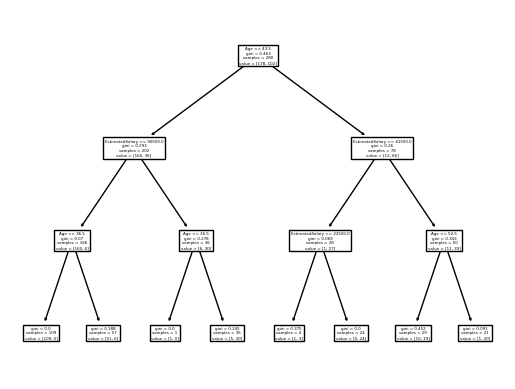

In [20]:
%matplotlib inline
from matplotlib import pyplot as plt 
from sklearn.tree import plot_tree
display(plot_tree(DTC, feature_names=["Age","EstimatedSalary"]))

**Visualising the Test set results**

[Text(0.5555555555555556, 0.875, 'Age <= 41.5\ngini = 0.45\nsamples = 120\nvalue = [79, 41]'),
 Text(0.3333333333333333, 0.625, 'EstimatedSalary <= 92500.0\ngini = 0.182\nsamples = 79\nvalue = [71, 8]'),
 Text(0.2222222222222222, 0.375, 'Age <= 36.5\ngini = 0.028\nsamples = 70\nvalue = [69, 1]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 53\nvalue = [53, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.7777777777777778, 0.625, 'EstimatedSalary <= 84500.0\ngini = 0.314\nsamples = 41\nvalue = [8, 33]'),
 Text(0.6666666666666666, 0.375, 'EstimatedSalary <= 62000.0\ngini = 0.435\nsamples = 25\nvalue = [8, 17]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]')]

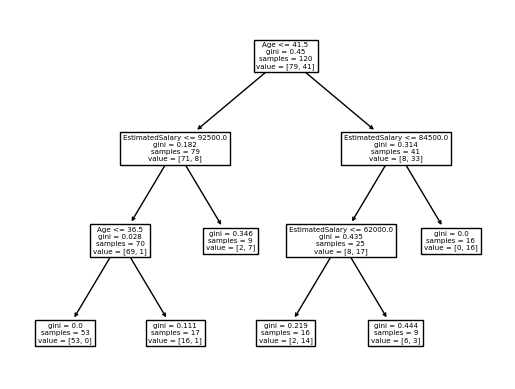

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt 
from sklearn.tree import plot_tree
DTC_tst = DecisionTreeClassifier(max_depth=3, min_samples_split=16)
DTC_tst.fit(x_test,y_test)
display(plot_tree(DTC_tst, feature_names=["Age","EstimatedSalary"]))